# LA Crime Data Analysis and Prediction

This notebook analyzes crime data from Los Angeles and implements various machine learning models to predict the type of crime (violent vs non-violent). 

## Dataset Overview
The dataset contains crime records from 2020 to present, including various features such as:
- Location (Area, LAT, LON)
- Temporal information (Date, Time)
- Victim demographics
- Crime characteristics

## Objective
Our main objective is to predict whether a crime is violent or non-violent based on various features. This binary classification task can help law enforcement:
- Allocate resources more effectively
- Implement preventive measures
- Improve emergency response planning

## Feature Selection
We've selected the following features for our prediction models:
1. `AREA` - Geographic location within LA
2. `hour` - Time of day
3. `month` - Seasonal patterns
4. `Vict Age` - Victim demographics
5. `Premis Cd` - Location type
6. `Weapon Used Cd` - Weapon information

These features were chosen based on their potential relevance to crime type prediction.

## Data Preprocessing

The following steps are performed for data preparation:
1. Loading and initial exploration of the dataset
2. Date/time processing
3. Feature engineering (creating crime_type, theft, and vehicular crime categories)
4. Handling outliers in victim age
5. Encoding categorical variables

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import datetime as dt
import json
from ast import literal_eval
from random import randint


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve


import warnings
warnings.filterwarnings('ignore')

In [95]:
#reading the CSV file into dataframe df
crime_df = pd.read_csv(r'D:\abdul\ML-ASSIGNMENT\Crime_Data_from_2020_to_Present.csv')
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [96]:
crime_df.shape

(743817, 28)

In [97]:
crime_df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [98]:
crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'])
crime_df['year'] = crime_df['DATE OCC'].dt.year
crime_df['month'] = crime_df['DATE OCC'].dt.month

In [99]:
occurred = pd.to_datetime(crime_df['DATE OCC'], infer_datetime_format=True)
reported = pd.to_datetime(crime_df['Date Rptd'], infer_datetime_format=True)

crime_df['year'] = occurred.map(lambda x: x.year)
crime_df['month'] = occurred.map(lambda x: x.month)

crime_df = crime_df.drop(columns=['DATE OCC', 'Date Rptd'])

In [100]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743817 entries, 0 to 743816
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           743817 non-null  int64  
 1   TIME OCC        743817 non-null  int64  
 2   AREA            743817 non-null  int64  
 3   AREA NAME       743817 non-null  object 
 4   Rpt Dist No     743817 non-null  int64  
 5   Part 1-2        743817 non-null  int64  
 6   Crm Cd          743817 non-null  int64  
 7   Crm Cd Desc     743817 non-null  object 
 8   Mocodes         641793 non-null  object 
 9   Vict Age        743817 non-null  int64  
 10  Vict Sex        646777 non-null  object 
 11  Vict Descent    646771 non-null  object 
 12  Premis Cd       743808 non-null  float64
 13  Premis Desc     743393 non-null  object 
 14  Weapon Used Cd  258193 non-null  float64
 15  Weapon Desc     258193 non-null  object 
 16  Status          743817 non-null  object 
 17  Status Des

In [101]:
crime_df.columns

Index(['DR_NO', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2',
       'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON',
       'year', 'month'],
      dtype='object')

In [102]:
# crime_df['hour'] = crime_df['TIME OCC'].str.split(':').str.astype(int)
crime_df['hour'] = crime_df['TIME OCC'] // 100

In [103]:
violent = ['BATTERY - SIMPLE ASSAULT', 'INTIMATE PARTNER - SIMPLE ASSAULT', 'CRIMINAL HOMICIDE', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',\
          'DISCHARGE FIREARMS/SHOTS FIRED', 'BATTERY POLICE (SIMPLE)', 'RAPE', 'FORCIBLE BATTERY WITH SEXUAL CONTACT', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',\
          'ROBBERY', 'SHOTS FIRED AT INHABITED DWELLING', 'OTHER ASSAULT', 'KIDNAPPING', 'BRANDISH WEAPON', 'ATTEMPTED ROBBERY']

theft = ['BURGLARY', 'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',\
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114',\
        'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036',\
        'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'THEFT, PERSON', 'BURGLARY, ATTEMPTED',\
        'BIKE - STOLEN', 'BUNCO, PETTY THEFT', 'BUNCO, GRAND THEFT', 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',\
        'THEFT PLAIN - ATTEMPT']

vehicular = ['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', \
             'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)', 'VEHICLE - ATTEMPT STOLEN', 'BURGLARY FROM VEHICLE, ATTEMPTED']

crime_df['crime_type'] = crime_df['Crm Cd Desc'].apply(lambda x: 'violent' if x in violent else 'nonviolent')
crime_df['theft'] = crime_df['Crm Cd Desc'].apply(lambda x: 1 if x in theft else 0)
crime_df['vehicular'] = crime_df['Crm Cd Desc'].apply(lambda x: 1 if x in vehicular else 0)


In [104]:
Q1 = crime_df['Vict Age'].quantile(0.25)
Q3 = crime_df['Vict Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = crime_df[(crime_df['Vict Age'] >= lower_bound) & (crime_df['Vict Age'] <= upper_bound)]


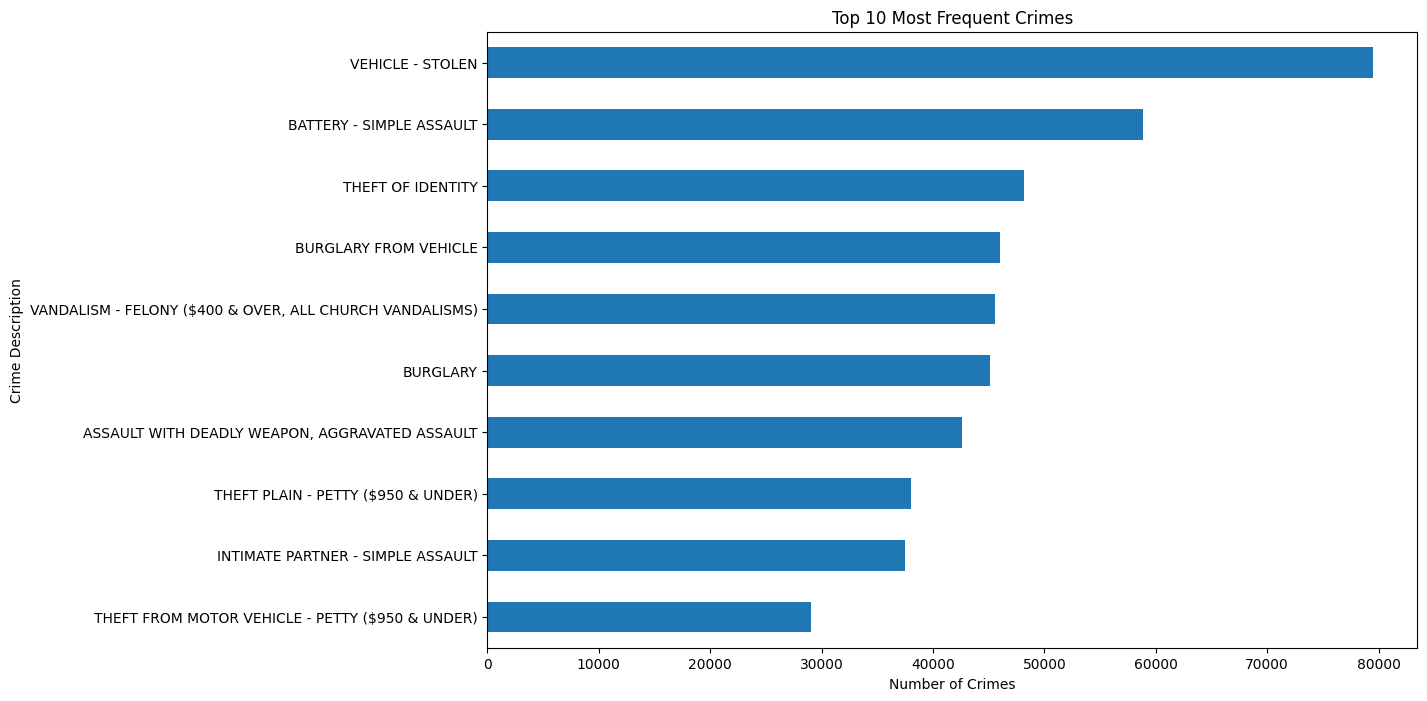

In [105]:
plt.figure(figsize=(12, 8))
df_no_outliers['Crm Cd Desc'].value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Frequent Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Description')
plt.gca().invert_yaxis()
plt.show()

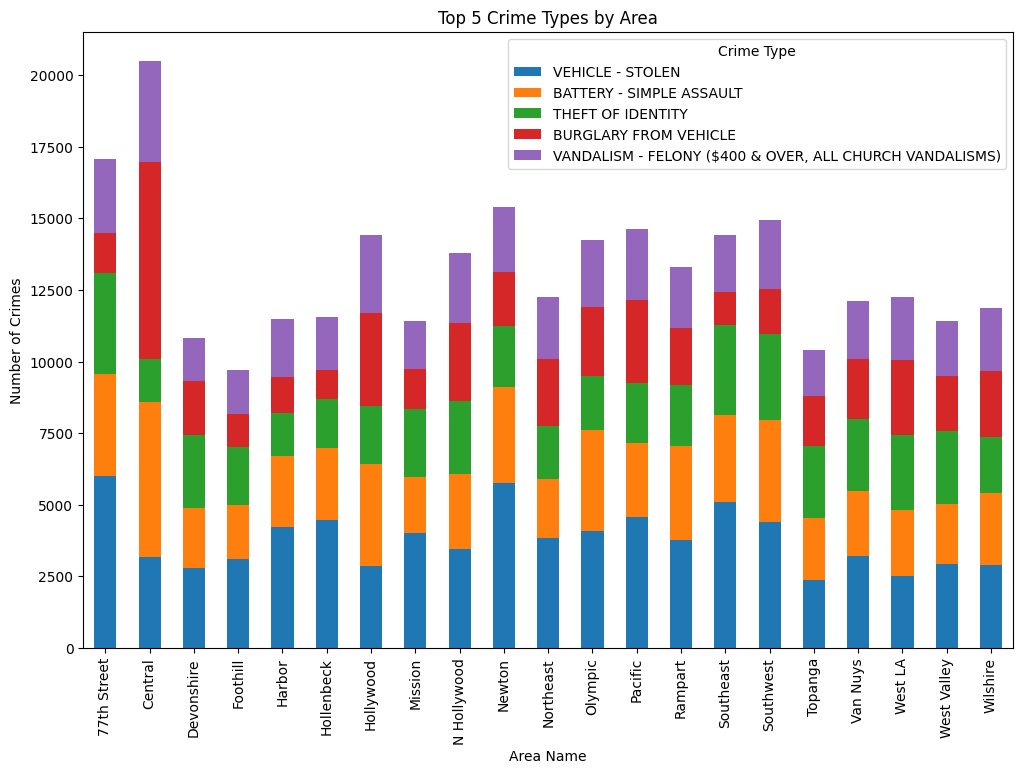

In [106]:
crime_by_area = df_no_outliers.groupby(['AREA NAME', 'Crm Cd Desc']).size().unstack(fill_value=0)
top_5_crimes = df_no_outliers['Crm Cd Desc'].value_counts().nlargest(5).index
crime_by_area_top_5 = crime_by_area[top_5_crimes]

crime_by_area_top_5.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 5 Crime Types by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.legend(title='Crime Type')
plt.show()

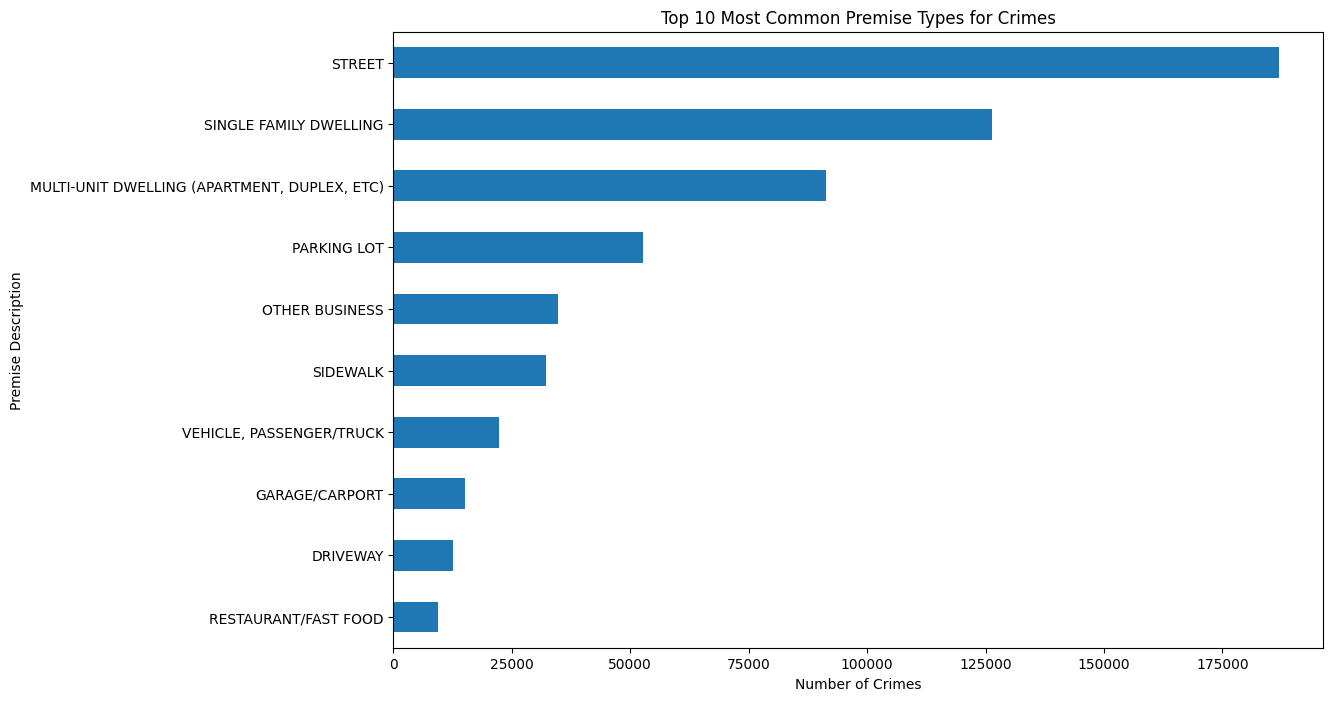

In [107]:
plt.figure(figsize=(12, 8))
df_no_outliers['Premis Desc'].value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Common Premise Types for Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Premise Description')
plt.gca().invert_yaxis()
plt.show()

## Model Implementation and Evaluation

We implement five different machine learning models to compare their performance in predicting crime types:

1. **Decision Tree Classifier**
   - Simple and interpretable
   - Can capture non-linear relationships
   - Provides feature importance

In [108]:
# Common features for all models
feature_columns = ['AREA', 'hour', 'month', 'Vict Age', 'Premis Cd', 'Weapon Used Cd']
target_column = 'crime_type'

# Prepare features
X = crime_df[feature_columns].copy()
y = crime_df[target_column]

#encoding categorical features
label_encoder = LabelEncoder()
categorical_features = ['AREA', 'Premis Cd', 'Weapon Used Cd']
for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])

#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model on all features
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions using all features
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy with all features: {accuracy:.2f}')

# Generate a classification report
class_report = classification_report(y_test, y_pred_dt)
print("\nClassification Report:")
print(class_report)

# PCA only for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Accuracy with all features: 0.89

Classification Report:
              precision    recall  f1-score   support

  nonviolent       0.93      0.93      0.93    174928
     violent       0.75      0.74      0.74     48218

    accuracy                           0.89    223146
   macro avg       0.84      0.83      0.84    223146
weighted avg       0.89      0.89      0.89    223146


Classification Report:
              precision    recall  f1-score   support

  nonviolent       0.93      0.93      0.93    174928
     violent       0.75      0.74      0.74     48218

    accuracy                           0.89    223146
   macro avg       0.84      0.83      0.84    223146
weighted avg       0.89      0.89      0.89    223146



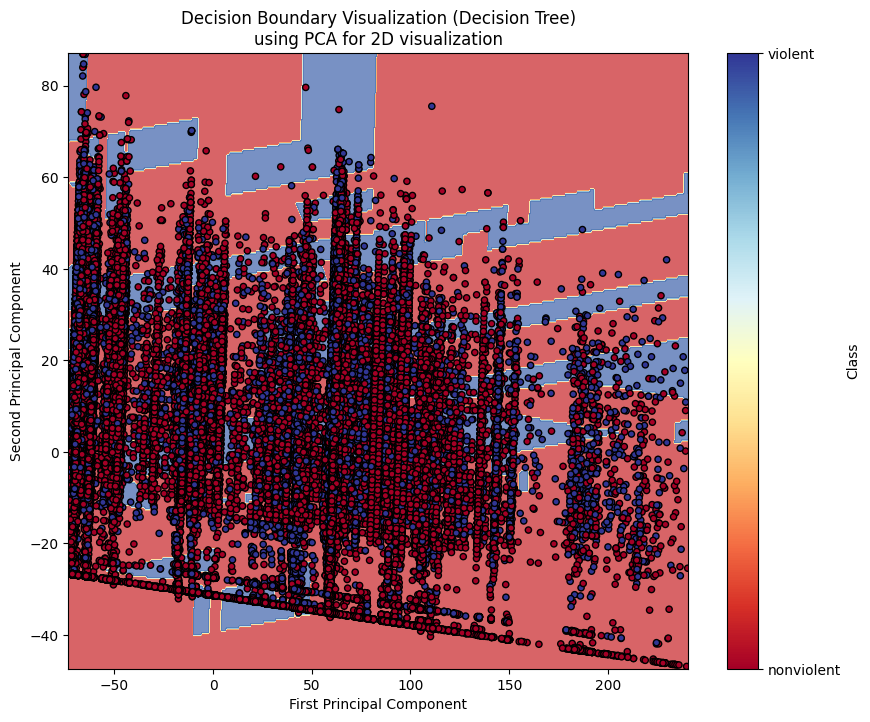

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Plot Decision Boundary using PCA transformed data for visualization
X_plot = X_test_pca

x_min, x_max = X_plot[:,0].min() - 0.5, X_plot[:,0].max() + 0.5
y_min, y_max = X_plot[:,1].min() - 0.5, X_plot[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))

# Make predictions for visualization grid using PCA
Z_labels = dt_clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Convert categorical labels to numeric for plotting
le = LabelEncoder()
le.fit(y_test)
y_test_encoded = le.transform(y_test)
Z = le.transform(Z_labels)
Z = Z.reshape(xx.shape)

# Create plot
plt.figure(figsize=(10, 8))

# Plot decision boundary and points
plt.contourf(xx, yy, Z, alpha=0.7, cmap='RdYlBu')
scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_test_encoded, cmap='RdYlBu', s=20, edgecolors='k')

# Add a colorbar and labels
try:
    cbar = plt.colorbar(scatter, ticks=range(len(le.classes_)))
    cbar.ax.set_yticklabels(le.classes_)
    cbar.set_label('Class')
except Exception:
    plt.colorbar(scatter, label='Class (Encoded)')

plt.title('Decision Boundary Visualization (Decision Tree)\nusing PCA for 2D visualization')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

**Naive Bayes Classifier**

2. **Naive Bayes Classifier**
   - Fast and efficient
   - Works well with categorical features
   - Handles both numerical and categorical data using different variants (Gaussian and Categorical)
   - Makes strong independence assumptions between features

In [110]:
# Use the same features as defined earlier
# feature_columns and target_column are already defined

# Create label encoder
le = LabelEncoder()
# Fit on both train and test labels to ensure all classes are known
le.fit(pd.concat([y_train, y_test]))

# Transform labels to numbers
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# Split data into train and test sets
X_train_nb = X_train.copy()
X_test_nb = X_test.copy()

# Gaussian Naive Bayes for numerical features
numerical_features = ['hour', 'month', 'Vict Age']
gnb = GaussianNB()
gnb.fit(X_train_nb[numerical_features], y_train_encoded)

# Categorical Naive Bayes for categorical features
categorical_features = ['AREA', 'Premis Cd', 'Weapon Used Cd']
cnb = CategoricalNB()
cnb.fit(X_train_nb[categorical_features], y_train_encoded)

# Combine predictions
y_pred_gnb = gnb.predict_proba(X_test_nb[numerical_features])
y_pred_cnb = cnb.predict_proba(X_test_nb[categorical_features])
y_pred_proba = (y_pred_gnb + y_pred_cnb) / 2
y_pred_nb = np.argmax(y_pred_proba, axis=1)

# Convert predictions back to original labels for reporting
y_pred_nb_labels = le.inverse_transform(y_pred_nb)

# Evaluate predictions
print("Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb_labels):.2f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb_labels))

Naive Bayes Model Performance:
Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

  nonviolent       0.89      0.96      0.93    174928
     violent       0.81      0.58      0.68     48218

    accuracy                           0.88    223146
   macro avg       0.85      0.77      0.80    223146
weighted avg       0.88      0.88      0.87    223146

              precision    recall  f1-score   support

  nonviolent       0.89      0.96      0.93    174928
     violent       0.81      0.58      0.68     48218

    accuracy                           0.88    223146
   macro avg       0.85      0.77      0.80    223146
weighted avg       0.88      0.88      0.87    223146



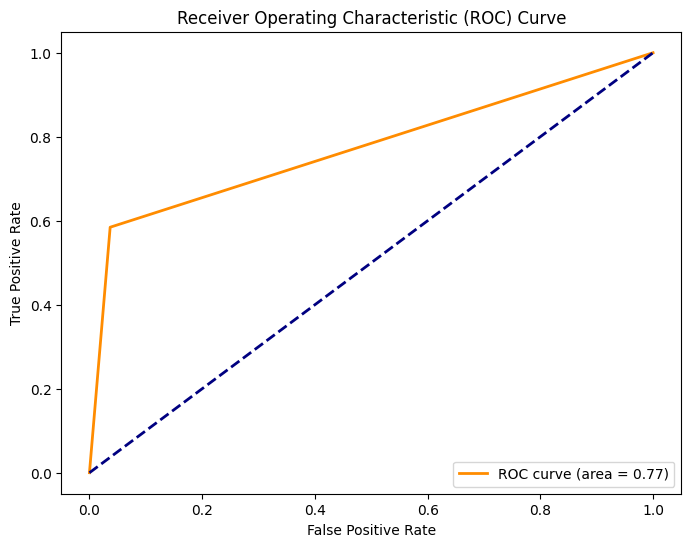

In [111]:
# Compute ROC curve and ROC area using encoded labels
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_nb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Random Forest Classifier**

3. **Random Forest Classifier**
   - Ensemble learning method
   - Reduces overfitting compared to single decision tree
   - Provides feature importance
   - Generally high accuracy and robust performance

In [112]:
train_cols = ['hour', 'month', 'LAT','LON', 'Rpt Dist No', 'Part 1-2', 'Vict Age'] 

In [113]:
model_df = crime_df.copy()
model_df = model_df[['crime_type','hour', 'month', 'LAT','LON', 'Rpt Dist No', 'Part 1-2', "Vict Age", 'theft', 'vehicular']]
model_df = model_df.dropna()

In [114]:
# Use the same features defined earlier
# X_train, X_test, y_train, y_test are already prepared

# Initialize and train Random Forest
rf_clf = RandomForestClassifier(n_estimators=50, criterion='gini',
                           max_depth=25, max_features=4, random_state=42)

rf_clf.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print('Random Forest Model Performance:')
print(f'Train accuracy: {accuracy_score(y_train, y_train_pred):.2f}')
print(f'Test accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_test_pred))

# Feature importance
feat_importance = pd.DataFrame(list(zip(feature_columns, rf_clf.feature_importances_)),
                             columns=['Feature', 'Importance'])
feat_importance = feat_importance.sort_values('Importance', ascending=False)
print('\nFeature Importance:')
print(feat_importance)

Random Forest Model Performance:
Train accuracy: 0.99
Test accuracy: 0.92

Classification Report:
Train accuracy: 0.99
Test accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

  nonviolent       0.95      0.94      0.95    174928
     violent       0.79      0.84      0.81     48218

    accuracy                           0.92    223146
   macro avg       0.87      0.89      0.88    223146
weighted avg       0.92      0.92      0.92    223146


Feature Importance:
          Feature  Importance
5  Weapon Used Cd    0.657622
3        Vict Age    0.111150
1            hour    0.066550
2           month    0.058621
0            AREA    0.056279
4       Premis Cd    0.049777
              precision    recall  f1-score   support

  nonviolent       0.95      0.94      0.95    174928
     violent       0.79      0.84      0.81     48218

    accuracy                           0.92    223146
   macro avg       0.87      0.89      0.88    223146
weighte

In [115]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

  nonviolent       0.95      0.94      0.95    174928
     violent       0.79      0.84      0.81     48218

    accuracy                           0.92    223146
   macro avg       0.87      0.89      0.88    223146
weighted avg       0.92      0.92      0.92    223146



In [116]:
feat_importance = pd.DataFrame(list(zip(train_cols, rf_clf.feature_importances_)))

feat_importance.sort_values(1, ascending=True).head()

,0,1
4,Rpt Dist No,0.049777
0,hour,0.056279
2,LAT,0.058621
1,month,0.066550
3,LON,0.111150


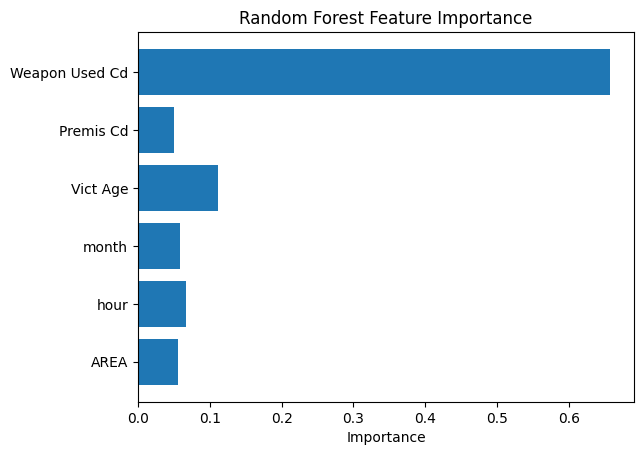

In [117]:
importances = list(rf_clf.feature_importances_)
feature_list = feature_columns  # not train_cols

plt.barh(feature_list, importances)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.show()

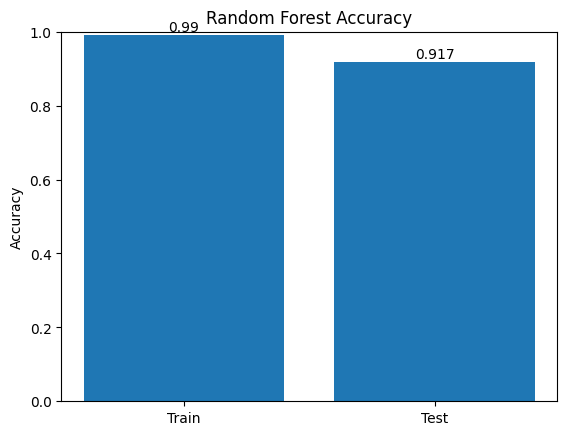

In [118]:
# Train and test accuracies from previous code
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Plot accuracies
plt.bar(['Train', 'Test'], [train_acc, test_acc])
plt.title('Random Forest Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0,1)

# Annotate values on bars
for i, v in enumerate([train_acc, test_acc]):
    plt.text(i, v + .01, str(round(v, 3)), ha='center')

plt.show()

**K Nearest Neighbour**

4. **K-Nearest Neighbors (KNN)**
   - Instance-based learning
   - Simple and effective
   - No training phase
   - Performance depends on feature scaling
   - k=11 chosen based on error rate analysis

In [119]:
target_column = 'crime_type'
feature_columns = ['AREA', 'hour','month', 'Vict Age', 'Premis Cd', 'Weapon Used Cd']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(crime_df[target_column])

# Select the feature columns and create your feature matrix
X = crime_df[feature_columns]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

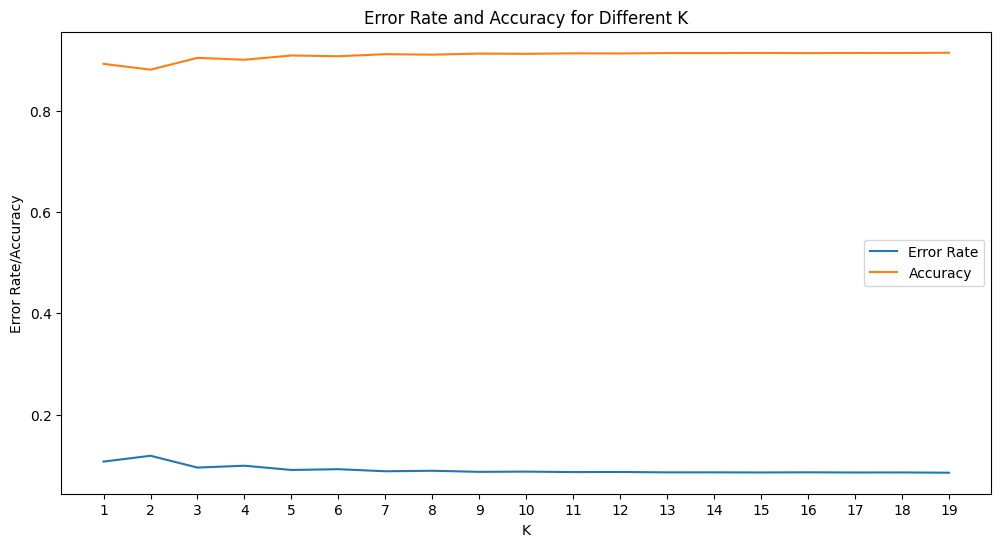

In [120]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Handle missing values (replace NaNs with column mean)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Range of K values to try
k_range = range(1, 20)

error_rate = []
accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_imputed, y_train)

    # Prediction and error calculation
    y_pred_knn = knn.predict(X_test_imputed)
    error_rate.append(1 - accuracy_score(y_test, y_pred_knn))
    accuracy.append(accuracy_score(y_test, y_pred_knn))

# Plot the error rate and accuracy
plt.figure(figsize=(12,6))
plt.plot(list(k_range), error_rate, label='Error Rate')
plt.plot(list(k_range), accuracy, label='Accuracy')
plt.xticks(list(k_range))
plt.legend()
plt.xlabel('K')
plt.ylabel('Error Rate/Accuracy')
plt.title('Error Rate and Accuracy for Different K')
plt.show()

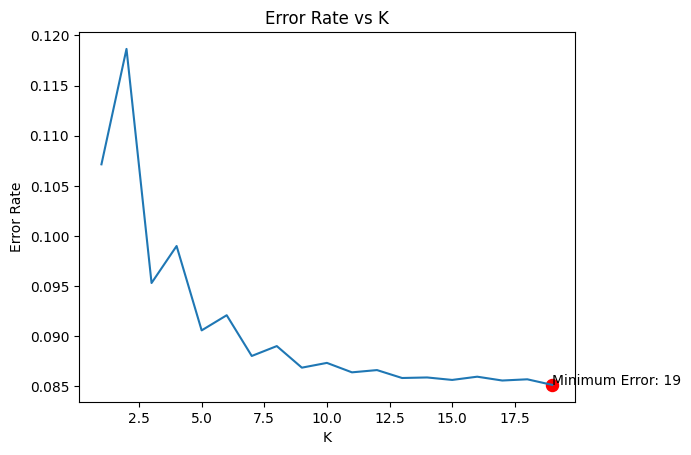

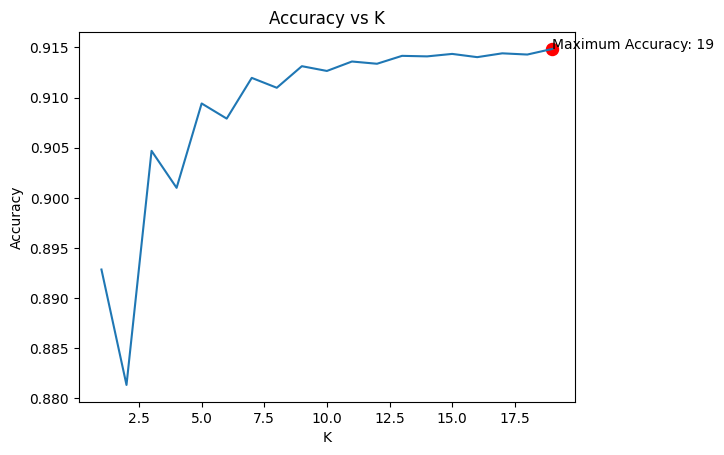

In [121]:
# Plot error rate vs k
plt.plot(k_range, error_rate)

# Find k that minimizes error
min_error = min(error_rate)
optimal_k = error_rate.index(min_error) + 1

# Highlight minimum error point
plt.scatter(optimal_k, min_error, s=75, c='red')

# Annotate minimum error
plt.annotate(f'Minimum Error: {optimal_k}', xy=(optimal_k, min_error))

plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K')


# Plot accuracy vs k
plt.figure()
plt.plot(k_range, accuracy)

# Find k that maximizes accuracy
max_accuracy = max(accuracy)
optimal_k = accuracy.index(max_accuracy) + 1

# Highlight maximum accuracy point
plt.scatter(optimal_k, max_accuracy, s=75, c='red')

# Annotate maximum accuracy
plt.annotate(f'Maximum Accuracy: {optimal_k}', xy=(optimal_k, max_accuracy))

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')

plt.show()

In [122]:
# Use the same features defined earlier
# X_train, X_test, y_train, y_test are already prepared

# Ensure missing values are imputed (use existing imputed arrays if available)
try:
	X_train_imputed
	X_test_imputed
except NameError:
	from sklearn.impute import SimpleImputer
	imputer = SimpleImputer(strategy='mean')
	X_train_imputed = imputer.fit_transform(X_train)
	X_test_imputed = imputer.transform(X_test)

# Initialize the KNN classifier
k = 19
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model on imputed data
knn.fit(X_train_imputed, y_train)

# Predict the target values
y_pred_knn = knn.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Model Performance:")
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Model Performance:
Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    174928
           1       0.78      0.84      0.81     48218

    accuracy                           0.91    223146
   macro avg       0.87      0.89      0.88    223146
weighted avg       0.92      0.91      0.92    223146



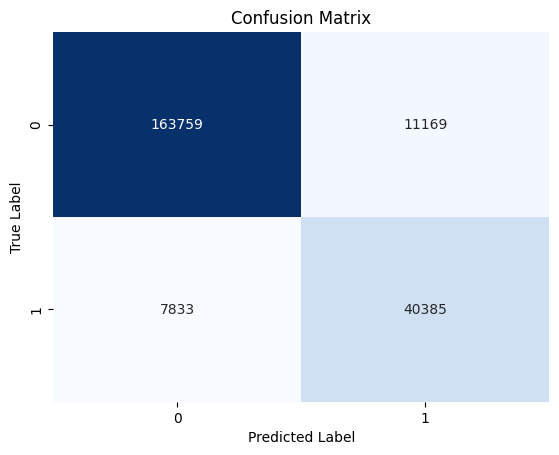

In [123]:

cm = confusion_matrix(y_test, y_pred_knn)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

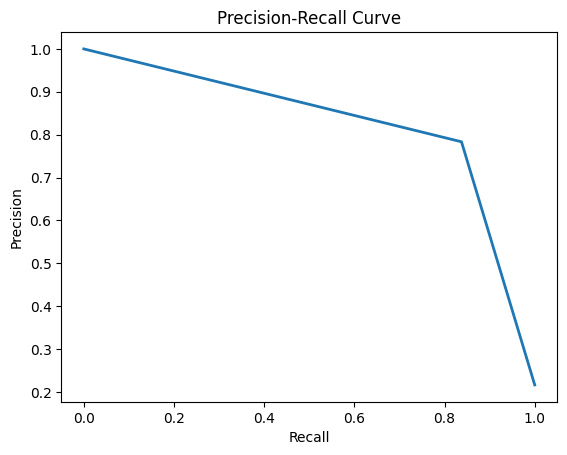

In [124]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_knn)

plt.plot(recalls, precisions, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

## Model Comparison and Analysis

The final comparison includes three key visualizations:

1. **Model Accuracy Comparison**
   - Bar plot showing accuracy scores for all models
   - Direct comparison of overall performance
   - Helps identify the best performing model

2. **Confusion Matrix Heatmaps**
   - Visual representation of True Positives, True Negatives, False Positives, and False Negatives
   - Shows where each model makes mistakes
   - Helps understand model-specific biases

3. **ROC Curves Comparison**
   - Shows the trade-off between True Positive Rate and False Positive Rate
   - Area Under Curve (AUC) scores indicate overall model performance
   - Helps in choosing optimal classification thresholds

This comparison helps in:
- Selecting the best model for deployment
- Understanding the strengths and weaknesses of each approach
- Making informed decisions about model selection based on specific requirements (accuracy vs. interpretability)

In [128]:
# Fix for mismatched label types
from sklearn.preprocessing import LabelEncoder

# Check current state
print("Current y_test sample:", y_test[:5])
print("Current y_test type:", type(y_test[0]) if hasattr(y_test, '__iter__') else type(y_test))

# Re-create the label encoder used in KNN section
le_knn = LabelEncoder()
le_knn.fit(['nonviolent', 'violent'])  # Fit with expected labels (alphabetical order: nonviolent=0, violent=1)

# Convert y_test back to string labels (since it was overwritten by KNN section)
if isinstance(y_test[0], (int, np.integer)):  # If y_test is encoded
    y_test = le_knn.inverse_transform(y_test)
    print("✅ Converted y_test back to string labels")

# Convert KNN predictions back to string labels
if isinstance(y_pred_knn[0], (int, np.integer)):  # If predictions are encoded
    y_pred_knn = le_knn.inverse_transform(y_pred_knn)
    print("✅ Converted y_pred_knn back to string labels")

print("\nFixed y_test sample:", y_test[:5])
print("Fixed y_pred_knn sample:", y_pred_knn[:5])

Current y_test sample: [1 0 0 0 0]
Current y_test type: <class 'numpy.int32'>
✅ Converted y_test back to string labels

Fixed y_test sample: ['violent' 'nonviolent' 'nonviolent' 'nonviolent' 'nonviolent']
Fixed y_pred_knn sample: ['violent' 'nonviolent' 'nonviolent' 'nonviolent' 'nonviolent']


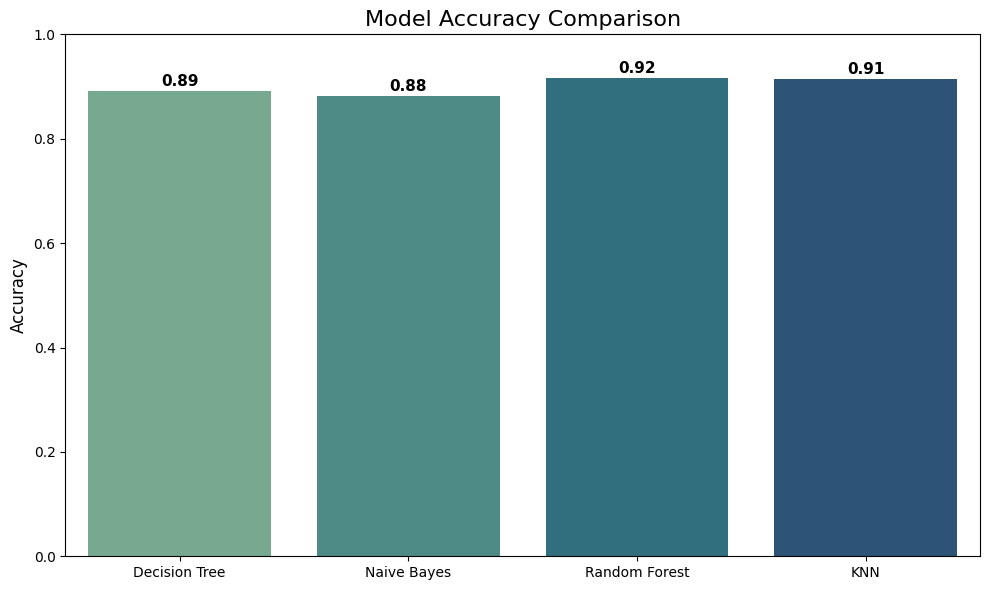

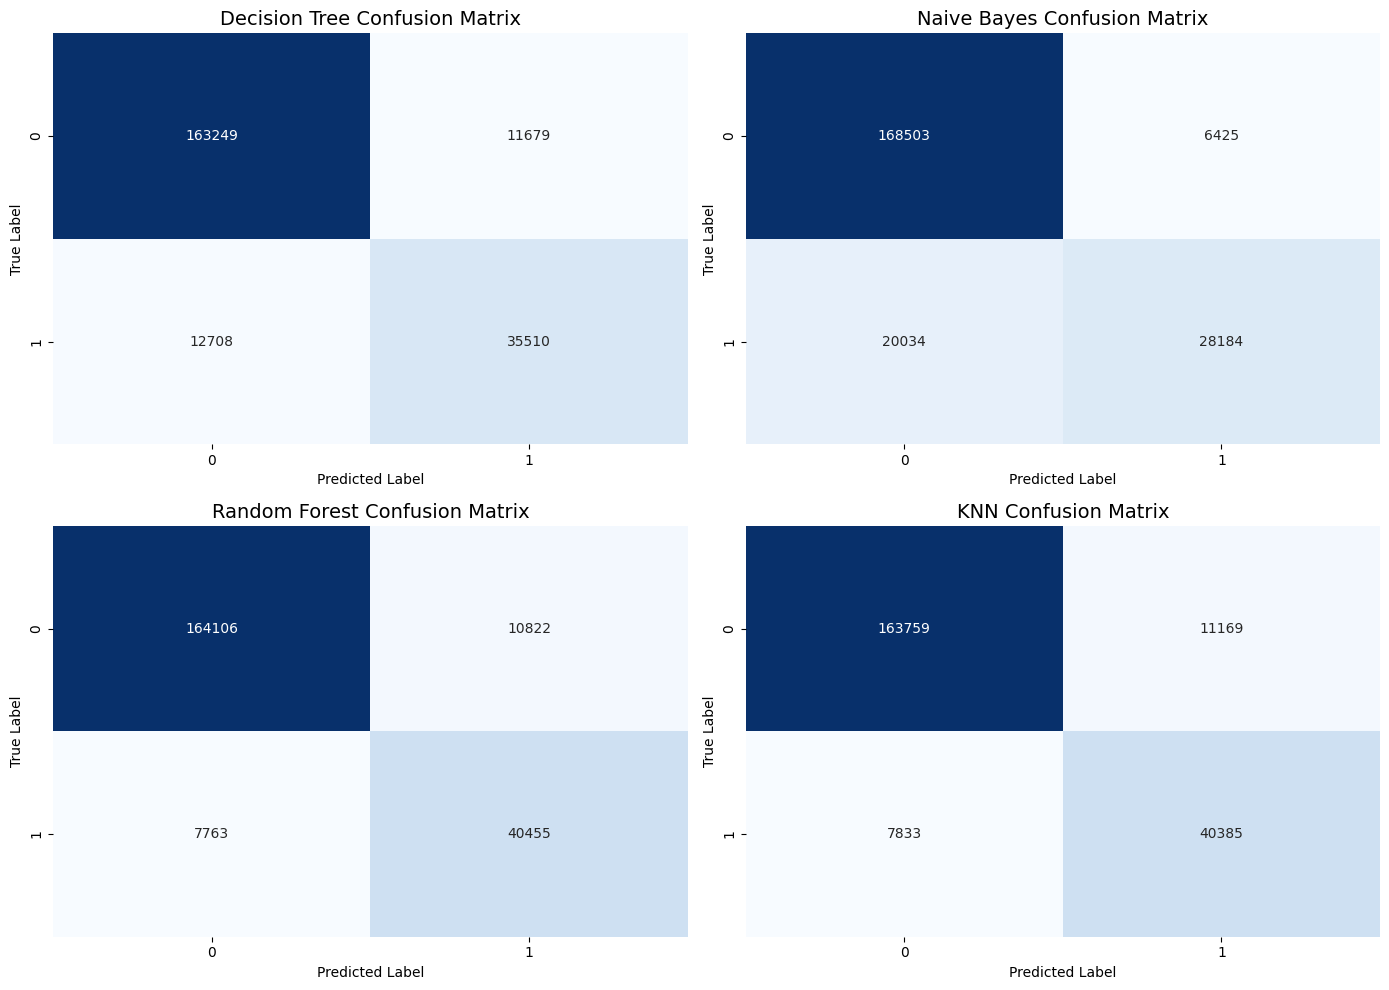

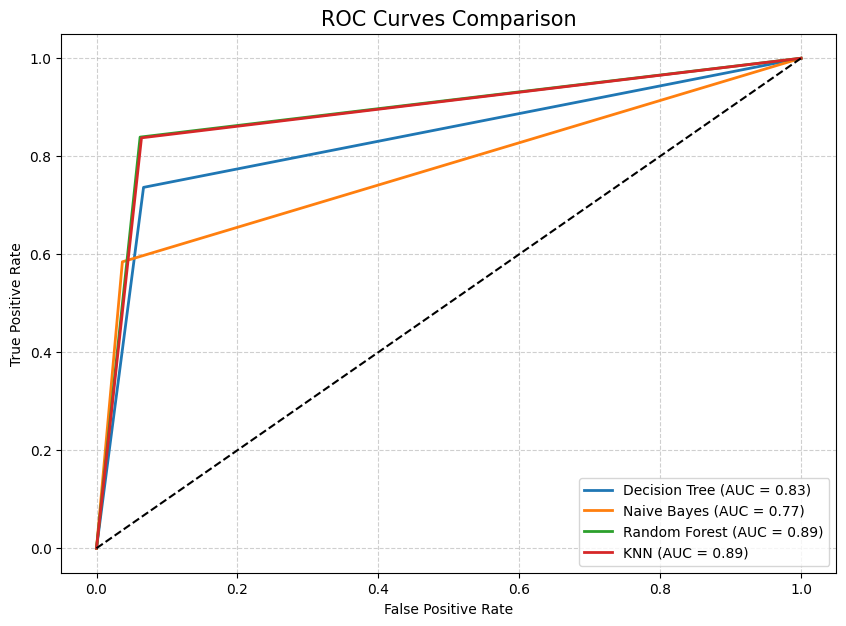


Model Performance Summary
        Model Accuracy
Decision Tree    0.891
  Naive Bayes    0.881
Random Forest    0.917
          KNN    0.915


In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ✅ Ensure label encoding for consistency in ROC curves
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# ✅ Make sure all model outputs are correctly named and available
# y_pred_dt         → Decision Tree
# y_pred_nb_labels  → Naive Bayes
# y_test_pred       → Random Forest
# y_pred_knn        → KNN

# 🧮 Accuracy scores
model_accuracies = {
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb_labels),
    "Random Forest": accuracy_score(y_test, y_test_pred),
    "KNN": accuracy_score(y_test, y_pred_knn)
}

# 🎯 1. Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="crest")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
for i, acc in enumerate(model_accuracies.values()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=11, weight='bold')
plt.tight_layout()
plt.show()

# 📊 2. Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()
models = {
    "Decision Tree": y_pred_dt,
    "Naive Bayes": y_pred_nb_labels,
    "Random Forest": y_test_pred,
    "KNN": y_pred_knn
}

for idx, (name, preds) in enumerate(models.items()):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx], cbar=False)
    axes[idx].set_title(f"{name} Confusion Matrix", fontsize=14)
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

plt.tight_layout()
plt.show()

# 📈 3. ROC Curve Comparison
plt.figure(figsize=(10, 7))
for name, preds in models.items():
    y_true = le.transform(y_test)
    y_pred_encoded = le.transform(preds) if isinstance(preds[0], str) else preds
    fpr, tpr, _ = roc_curve(y_true, y_pred_encoded)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.title("ROC Curves Comparison", fontsize=15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 🧾 4. Summary Table
summary_df = pd.DataFrame({
    "Model": list(model_accuracies.keys()),
    "Accuracy": [f"{v:.3f}" for v in model_accuracies.values()]
})

print("\nModel Performance Summary")
print("=" * 35)
print(summary_df.to_string(index=False))